## Importing packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from sklearn import svm
import xgboost as xgb

import math
from tqdm.notebook import tqdm
from scipy.stats import randint as sp_randint
warnings.filterwarnings("ignore")

In [ ]:
pd.options.display.max_columns = 500

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/aps_failure_training_set.csv', skiprows=20, na_values='na')
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/aps_failure_test_set.csv', skiprows=20, na_values='na')
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,0.0,0.0,0.0,1520.0,2374.0,11516.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13124.0,2.0,1956.0,434.0,76.0,174.0,190.0,6198.0,1148.0,2948.0,2.0,0.0,8762.0,2566.0,480.0,380.0,196.0,516.0,86.0,66.0,74.0,0.0,124340.0,4.0,6.0,4.0,0.0,3976.0,318.0,107662.0,3458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110980.0,59.53,124340.0,124340.0,184970.0,54.0,686.0,12246.0,123880.0,13196.0,1209600.0,598.0,0.0,6.0,0.0,5913.60,0.00,5851.20,6.0,30.0,0.0,2.0,5512.0,4674.0,1388.0,1508.0,38.0,4.0,0.0,0.0,8.0,12.0,124340.0,0.0,1550.0,14.0,36.0,26.0,920.0,430.0,7650.0,2294.0,206.0,0.0,22.0,42.0,5336.0,1276.0,0.0,0.0,0.0,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,1100.0,574.0,232.0,66.0,780.0,882.0,0.0,4.0,0.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,0.0,60.0,0.0,0.0,0.0,23174.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,16286.0,0.0,280.0,44.0,50.0,1274.0,866.0,3362.0,11102.0,0.0,0.0,0.0,12564.0,1756.0,638.0,276.0,172.0,132.0,812.0,308.0,192.0,128.0,46894.0,4.0,2.0,38.0,0.0,5244.0,360.0,20520.0,3134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23320.0,81.89,46894.0,46894.0,48324.0,68.0,0.0,4486.0,46480.0,17050.0,1209600.0,726.0,2.0,4.0,0.0,7224.96,0.00,7768.32,0.0,42.0,0.0,0.0,4.0,7064.0,6200.0,2452.0,1246.0,12.0,0.0,0.0,14.0,54.0,46894.0,0.0,2202.0,28.0,114.0,350.0,700.0,1708.0,9622.0,2174.0,80.0,0.0,80.0,206.0,7802.0,1466.0,0.0,0.0,0.0,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,3996.0,584.0,200.0,62.0,37580.0,3756.0,6368.0,36.0,0.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,0.0,77898.0,110548.0,3605894.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,474782.0,0.0,22984.0,894.0,1162.0,1304.0,1856.0,388700.0,3424812.0,123828.0,23260.0,0.0,1662580.0,667960.0,387998.0,226078.0,161558.0,148288.0,154908.0,220820.0,147744.0,210866.0,4644422.0,958.0,7848.0,3624.0,0.0,1891670.0,47066.0,692800.0,265492.0,336240.0,194360.0,245240.0,NaN,NaN,NaN,NaN,NaN,175480.0,66002.89,4644422.0,4644422.0,4608738.0,22706.0,2272.0,95510.0,1006260.0,3991552.0,1209600.0,126310.0,0.0,104.0,0.0,3594885.12,0.00,374649.60,148.0,720.0,0.0,5154.0,174956.0,622312.0,1002504.0,793938.0,541734.0,345896.0,300806.0,201500.0,52.0,92.0,4644422.0,0.0,24818.0,964.0,162660.0,215004.0,217930.0,3038612.0,322718.0,6080.0,14.0,0.0,226.0,572.0,3593728.0,1911060.0,0.0,284.0,0.0,0.0,3613906.0,

In [ ]:
print(train.shape)
print(test.shape)

(60000, 171)
(16000, 171)


In [ ]:
train.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,59329.000000,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.931200e+04,5.935500e+04,57275.000000,57273.000000,57497.000000,57500.000000,5.935800e+04,5.935800e+04,5.941100e+04,5.941100e+04,3.696600e+04,3.272300e+04,2.045100e+04,1.599100e+04,1.366700e+04,1.226000e+04,1.127800e+04,1.073600e+04,5.927400e+04,5.983300e+04,5.930900e+04,5.930900e+04,5.674300e+04,5.952700e+04,5.727700e+04,55644.000000,5.927400e+04,5.674500e+04,59324.0,5.749800e+04,4.513900e+04,45139.000000,45139.000000,5.966200e+04,5.966200e+04,5.966200e+04,50447.000000,50123.000000,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,5.931300e+04,4.513900e+04,57276.000000,5.930900e+04,13671.000000,59331.000000,59331.000000,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,5.933100e+04,46192.000000,46192.000000,4.619200e+04,4.619200e+04,46192.000000,4.619200e+04,46192.000000,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
test.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,16000,1.600000e+04,3637.000000,1.507400e+04,12019.000000,15310.000000,15310.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.582500e+04,1.583700e+04,1.583700e+04,1.480200e+04,1.583100e+04,1.583700e+04,1.583100e+04,1.583800e+04,1.583100e+04,1.583800e+04,15236.000000,1.583700e+04,1.583700e+04,1.583700e+04,15312.000000,15312.000000,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15808.000000,15808.000000,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.580700e+04,1.582500e+04,15236.000000,15236.000000,15310.000000,15311.000000,1.583100e+04,1.583100e+04,1.583800e+04,1.583800e+04,9.906000e+03,8.774000e+03,5.454000e+03,4.287000e+03,3.624000e+03,3.279000e+03,3.019000e+03,2.871000e+03,1.579800e+04,1.597200e+04,1.581000e+04,1.581000e+04,1.513400e+04,15893.000000,1.523700e+04,14794.000000,1.579800e+04,1.513500e+04,15815.0,1.531200e+04,12019.000000,12019.000000,12019.000000,1.591400e+04,1.591400e+04,1.591400e+04,13541.000000,13422.000000,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,1.580600e+04,12019.000000,15237.000000,1.581000e+04,3637.000000,15811.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,1.581100e+04,12282.000000,12282.000000,1.228200e+04,1.228200e+04,12282.000000,1.228200e+04,12282.000000,12282.000000,1.228200e+04,15312.000000,15236.000000,1.490600e+04,1.490600e+04,1.490600e+04,1.490600e+04,14906.000000,1.490600e+04,1.490600e+04,1.490600e+04,1.581000e+04,1.523600e+04,15236.000000,1.523600e+04,1.523600e+04,1.523600e+04,15236.000000,1.523600e+04,1.523600e+04,1.523600e+04,1.523600e+04,15238.000000,15238.000000,1.490600e+04,13356.000000,13541.000000,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15238.000000,15238.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
train.isna().any().value_counts() # Checking for missing values

True     169
False      2
dtype: int64

In [ ]:
train.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [ ]:
train['class'].value_counts()  # Class label count 

neg    59000
pos     1000
Name: class, dtype: int64

In [ ]:
test['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [ ]:
missing = train.isna().sum().div(train.shape[0]).mul(100).to_frame()
cols_missing = missing[missing[0]>75]
cols_missing

,0
ab_000,77.215000
bo_000,77.221667
bp_000,79.566667
bq_000,81.203333
br_000,82.106667
cr_000,77.215000


In [ ]:
c=list()
for i in train.columns:
    c.append(len(train[i].unique()))  #avg.number of unique values in all columns
np.mean(c)

17133.783625730994

In [ ]:
train.skew(axis=0, skipna=True)

class       7.551146
aa_000      6.115752
ab_000     28.085266
ac_000      1.784845
ad_000    212.459406
             ...    
ee_007     15.717250
ee_008     13.426265
ee_009     29.214135
ef_000     73.432440
eg_000     89.029482
Length: 171, dtype: float64

## Classification Models (without much Pre-processing)

In [ ]:
train=train.dropna()  # Dropping Missing Values
test=test.dropna()

train['class']=train['class'].replace({'neg':0, 'pos':1})    # Converting Class labels to numeric values
test['class']=test['class'].replace({'neg':0, 'pos':1})

X_train=train.drop(['class'],axis=1)  # Splitting the features and target from the dataframe
y_train=train['class']

X_test=test.drop(['class'],axis=1)
y_test=test['class']

In [ ]:
print(train.shape)
print(test.shape)

(591, 171)
(165, 171)


### Metrics function

In [ ]:
def my_scorer(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp+500*fn
    return cost

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

### 1. Logistic Regression



In [ ]:
def LogisticRegressionFunc(X_train, X_test, y_train, y_test):
    print("** Logistic Regression: \n")
    LR = LogisticRegression(max_iter = 1000, random_state=0)
    LR.fit(X_train, y_train)
    print_score(LR, X_train, X_test, y_train, y_test, train=True)
    print(f'Total cost:\t\t {my_scorer(y_train, LR.predict(X_train))}')
    print('-'*55 + "\n")
    print_score(LR, X_train, X_test, y_train, y_test, train=False)
    print(f'Total cost: \t{my_scorer(y_test, LR.predict(X_test))}')
    print('-'*55 + "\n")

In [ ]:
LogisticRegressionFunc(X_train, X_test, y_train, y_test)

** Logistic Regression: 

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00        76

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591


Confusion Matrix: 
 [[515   0]
 [  0  76]]

ROC AUC: 1.0000

Total cost:		 0
-------------------------------------------------------

Test Result:

accuracy score: 0.9515

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.84      0.90      0.87        30

    accuracy                           0.95       165
   macro avg       0.91      0.93      0.92       165
weighted avg       0.95      0.95      0.95       165


Confusion Matrix: 
 [[130   5]
 [  3  27]]

ROC AUC: 0.93

### 2. K Nearest Neighbours

In [ ]:
def KNN(X_train, X_test, y_train, y_test):
    print("** K Nearest Neighbors: \n")
    knn = KNeighborsClassifier(n_jobs=-1) # n_neighbors=5,p=2, metric='minkowski')
    knn.fit(X_train,y_train)
    print_score(knn, X_train, X_test, y_train, y_test, train=True)
    print(f'Total cost:\t\t {my_scorer(y_train, knn.predict(X_train))}')
    print('-'*55 + "\n")
    print_score(knn, X_train, X_test, y_train, y_test, train=False)
    print(f'Total cost: \t{my_scorer(y_test, knn.predict(X_test))}')
    print('-'*55 + "\n")

In [ ]:
KNN(X_train, X_test, y_train, y_test)

** K Nearest Neighbors: 

Train Result:

accuracy score: 0.9154

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       515
           1       0.82      0.43      0.57        76

    accuracy                           0.92       591
   macro avg       0.87      0.71      0.76       591
weighted avg       0.91      0.92      0.90       591


Confusion Matrix: 
 [[508   7]
 [ 43  33]]

ROC AUC: 0.7103

Total cost:		 21570
-------------------------------------------------------

Test Result:

accuracy score: 0.8545

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.91       135
           1       0.67      0.40      0.50        30

    accuracy                           0.85       165
   macro avg       0.77      0.68      0.71       165
weighted avg       0.84      0.85      0.84       165


Confusion Matrix: 
 [[129   6]
 [ 18  12]]

ROC AUC: 

### 3. Random Forests

In [ ]:
def RandomForest(X_train, X_test, y_train, y_test):
    print("** Random Forest: \n")
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(X_train, y_train)
    print_score(rf, X_train, X_test, y_train, y_test, train=True)
    print(f'Total cost:\t\t {my_scorer(y_train, rf.predict(X_train))}')
    print('-'*55 + "\n")
    print_score(rf, X_train, X_test, y_train, y_test, train=False)
    print(f'Total cost: \t{my_scorer(y_test, rf.predict(X_test))}')
    print('-'*55 + "\n")

In [ ]:
RandomForest(X_train, X_test, y_train, y_test)

** Random Forest: 

Train Result:

accuracy score: 0.9526

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       515
           1       0.98      0.64      0.78        76

    accuracy                           0.95       591
   macro avg       0.97      0.82      0.88       591
weighted avg       0.95      0.95      0.95       591


Confusion Matrix: 
 [[514   1]
 [ 27  49]]

ROC AUC: 0.8214

Total cost:		 13510
-------------------------------------------------------

Test Result:

accuracy score: 0.9212

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       135
           1       0.95      0.60      0.73        30

    accuracy                           0.92       165
   macro avg       0.93      0.80      0.84       165
weighted avg       0.92      0.92      0.91       165


Confusion Matrix: 
 [[134   1]
 [ 12  18]]

ROC AUC: 0.7963

### 4. SVM (Support Vector Machine)

In [ ]:
def SVM(X_train, X_test, y_train, y_test):
    print("** Support Vector Machine: \n")
    SV = svm.SVC()
    SV.fit(X_train, y_train)
    print_score(SV, X_train, X_test, y_train, y_test, train=True)
    print(f'Total cost:\t\t {my_scorer(y_train, SV.predict(X_train))}')
    print('-'*55 + "\n")
    print_score(SV, X_train, X_test, y_train, y_test, train=True)
    print(f'Total cost: \t{my_scorer(y_test, SV.predict(X_test))}')
    print('-'*55 + "\n")

In [ ]:
SVM(X_train, X_test, y_train, y_test)

** Support Vector Machine: 

Train Result:

accuracy score: 0.8714

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       515
           1       0.00      0.00      0.00        76

    accuracy                           0.87       591
   macro avg       0.44      0.50      0.47       591
weighted avg       0.76      0.87      0.81       591


Confusion Matrix: 
 [[515   0]
 [ 76   0]]

ROC AUC: 0.5000

Total cost:		 38000
-------------------------------------------------------

Train Result:

accuracy score: 0.8714

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       515
           1       0.00      0.00      0.00        76

    accuracy                           0.87       591
   macro avg       0.44      0.50      0.47       591
weighted avg       0.76      0.87      0.81       591


Confusion Matrix: 
 [[515   0]
 [ 76   0]]

ROC A

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Gaussian Naives Bayes

In [ ]:
def NaivesBayes(X_train, X_test, y_train, y_test):
    print("** Naive Bayes: \n")
    NB = GaussianNB()
    NB.fit(X_train,y_train)
    print_score(NB, X_train, X_test, y_train, y_test, train=True)
    print(f'Total cost:\t\t {my_scorer(y_train, NB.predict(X_train))}')
    print('-'*55 + "\n")
    print_score(NB, X_train, X_test, y_train, y_test, train=False)
    print(f'Total cost: \t{my_scorer(y_test, NB.predict(X_test))}')
    print('-'*55 + "\n")

In [ ]:
NaivesBayes(X_train, X_test, y_train, y_test)

** Naive Bayes: 

Train Result:

accuracy score: 0.9086

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       515
           1       0.61      0.83      0.70        76

    accuracy                           0.91       591
   macro avg       0.79      0.87      0.82       591
weighted avg       0.93      0.91      0.91       591


Confusion Matrix: 
 [[474  41]
 [ 13  63]]

ROC AUC: 0.8747

Total cost:		 6910
-------------------------------------------------------

Test Result:

accuracy score: 0.9030

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       135
           1       0.69      0.83      0.76        30

    accuracy                           0.90       165
   macro avg       0.83      0.88      0.85       165
weighted avg       0.91      0.90      0.91       165


Confusion Matrix: 
 [[124  11]
 [  5  25]]

ROC AUC: 0.8759

T

### 6. Decision Tree

In [ ]:
def DecisionTree(X_train, X_test, y_train, y_test):
    print("** Decision Tree: \n")
    DT = DecisionTreeClassifier()
    DT.fit(X_train,y_train)
    print_score(DT, X_train, X_test, y_train, y_test, train=True)
    print(f'Total cost:\t\t {my_scorer(y_train, DT.predict(X_train))}')
    print('-'*55 + "\n")
    print_score(DT, X_train, X_test, y_train, y_test, train=False)
    print(f'Total cost: \t{my_scorer(y_test, DT.predict(X_test))}')
    print('-'*55 + "\n")

In [ ]:
DecisionTree(X_train, X_test, y_train, y_test)

** Decision Tree: 

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00        76

    accuracy                           1.00       591
   macro avg       1.00      1.00      1.00       591
weighted avg       1.00      1.00      1.00       591


Confusion Matrix: 
 [[515   0]
 [  0  76]]

ROC AUC: 1.0000

Total cost:		 0
-------------------------------------------------------

Test Result:

accuracy score: 0.8970

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       135
           1       0.78      0.60      0.68        30

    accuracy                           0.90       165
   macro avg       0.85      0.78      0.81       165
weighted avg       0.89      0.90      0.89       165


Confusion Matrix: 
 [[130   5]
 [ 12  18]]

ROC AUC: 0.7815

To

##Preprocessing data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/aps_failure_training_set.csv', skiprows=20, na_values='na')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/aps_failure_test_set.csv', skiprows=20, na_values='na')

In [ ]:
train['class']=train['class'].replace({'neg':0, 'pos':1})   # Converting Class labels to numeric values
test['class']=test['class'].replace({'neg':0, 'pos':1})

In [ ]:
print(train['class'].value_counts())
print(test['class'].value_counts())

0    59000
1     1000
Name: class, dtype: int64
0    15625
1      375
Name: class, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['class'], axis=1), train[['class']], stratify=train[['class']], test_size = 0.15, random_state=0)

In [ ]:
temp = y_train

In [ ]:
y_test = test[['class']]
X_test = test.drop(['class'], axis=1)

In [ ]:
print(y_train.value_counts())
print(y_valid.value_counts())
print(y_test.value_counts())

class
0        50150
1          850
dtype: int64
class
0        8850
1         150
dtype: int64
class
0        15625
1          375
dtype: int64


### Imputing missing data

#### Mean impute

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(X_train)
train_mean = pd.DataFrame(imp_mean.transform(X_train), columns=X_train.columns)
valid_mean = pd.DataFrame(imp_mean.transform(X_valid), columns=X_train.columns)
test_mean = pd.DataFrame(imp_mean.transform(X_test), columns=X_test.columns)

In [ ]:
scaler = StandardScaler().fit(train_mean)
train_mean_std = pd.DataFrame(scaler.transform(train_mean), columns=X_train.columns)
valid_mean_std = pd.DataFrame(scaler.transform(valid_mean), columns=X_train.columns)
test_mean_std = pd.DataFrame(scaler.transform(test_mean), columns=X_test.columns)

#### Median impute

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train)
train_median = pd.DataFrame(imp_median.transform(X_train), columns=X_train.columns)
valid_median = pd.DataFrame(imp_median.transform(X_valid), columns=X_train.columns)
test_median = pd.DataFrame(imp_median.transform(X_test), columns=X_test.columns)

In [ ]:
scaler = StandardScaler().fit(train_median)
train_median_std = pd.DataFrame(scaler.transform(train_median), columns=X_train.columns)
valid_median_std = pd.DataFrame(scaler.transform(valid_median), columns=X_train.columns)
test_median_std = pd.DataFrame(scaler.transform(test_median), columns=X_test.columns)

#### Mode impute

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(X_train)
train_mode = pd.DataFrame(imp_mode.transform(X_train), columns=X_train.columns)
valid_mode = pd.DataFrame(imp_mode.transform(X_valid), columns=X_train.columns)
test_mode = pd.DataFrame(imp_mode.transform(X_test), columns=X_test.columns)

In [ ]:
scaler = StandardScaler().fit(train_mode)
train_mode_std = pd.DataFrame(scaler.transform(train_mode), columns=X_train.columns)
valid_mode_std = pd.DataFrame(scaler.transform(valid_mode), columns=X_train.columns)
test_mode_std = pd.DataFrame(scaler.transform(test_mode), columns=X_test.columns)

### Function to find out best threshold

In [ ]:
def plot_precision_recall_costs(model, data, y_true):
    y_pred = model.predict_proba(data)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    thresholds = np.append(thresholds,1)

    costs = []

    for threshold in tqdm(thresholds):
        y_hat = y_pred > threshold
        tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
        cost = fp*10+fn*500
        costs.append(cost)
    plt.figure(figsize=(20,6))

    plt.subplot(121)
    plt.plot(thresholds, precision, label='Precision')
    plt.plot(thresholds, recall, label='Recall')
    plt.legend()
    plt.xlabel("Thresholds")
    plt.ylabel("Precision_Recall")
    plt.title("Precision_Recall-Threshold Plot")
    plt.grid()

    plt.subplot(122)
    plt.plot(thresholds, costs, label='Costs')
    plt.legend()
    plt.xlabel("Thresholds")
    plt.ylabel("Costs")
    plt.title("Cost-Threshold Plot")
    plt.grid()
    plt.show()

    print("Best threshold: {:.4f}".format(thresholds[np.argsort(costs)[0]]))
    print("Min cost: {:.2f}".format(costs[np.argsort(costs)[0]]))
    return thresholds[np.argsort(costs)[0]], costs[np.argsort(costs)[0]]

### Using imbalanced data

#### Mean

In [ ]:
costs = []

##### Logistic Regression

In [ ]:
C = [math.pow(10,i) for i in range(-2,2)]

params = [{'C': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

clf = GridSearchCV(LogisticRegression(), params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_mean_std, y_train)

print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mean_std, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   48.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'class_weight': 'balanced'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight='balanced',
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                        

100%|██████████| 9001/9001 [03:32<00:00, 42.40it/s]


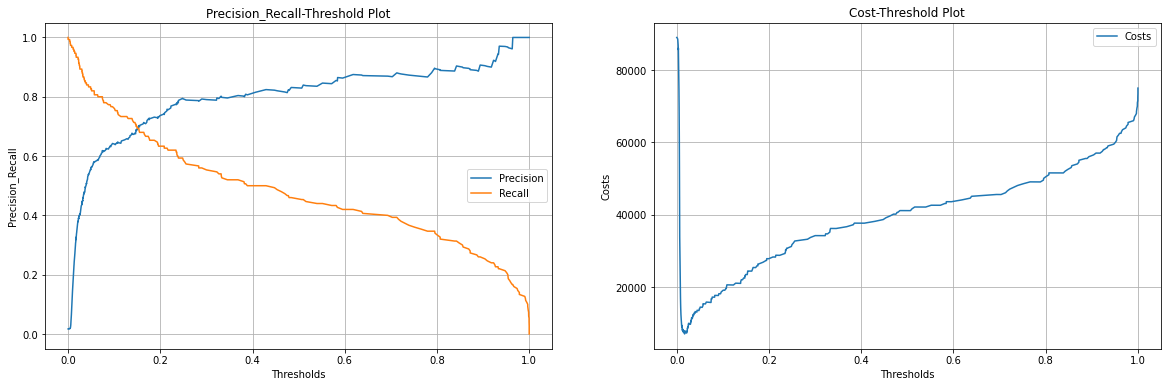

Best threshold: 0.0171
Min cost: 7030.00
Train Cost:  32150
Test Cost:  15060


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mean_std, y_valid)

y_train_pred = calib.predict_proba(train_mean_std)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mean_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mean","Logistic Regression", train_cost, cost, test_cost])

##### Support Vector Machines

In [ ]:
C = [math.pow(10,i) for i in range(-2,2)]

params = [{'alpha': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

clf = GridSearchCV(SGDClassifier(loss="hinge",max_iter=1000, n_jobs=-1), params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_mean_std, y_train)

print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mean_std, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.9min finished


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'class_weight': 'balanced'}


CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  



  0%|          | 0/9001 [00:00<?, ?it/s]

  0%|          | 3/9001 [00:00<05:55, 25.29it/s]

  0%|          | 8/9001 [00:00<05:11, 28.92it/s]

  0%|          | 13/9001 [00:00<04:41, 31.91it/s]

  0%|          | 18/9001 [00:00<04:18, 34.73it/s]

  0%|          | 23/9001 [00:00<04:02, 36.99it/s]

  0%|          | 28/9001 [00:00<03:53, 38.41it/s]

  0%|          | 33/9001 [00:00<03:45, 39.84it/s]

  0%|          | 37/9001 [00:00<03:44, 39.88it/s]

  0%|          | 42/9001 [00:01<03:38, 41.02it/s]

  1%|          | 47/9001 [00:01<03:36, 41.36it/s]

  1%|          | 52/9001 [00:01<03:33, 41.96it/s]

  1%|          | 57/9001 [00:01<03:31, 42.31it/s]

  1%|          | 62/9001 [00:01<03:31, 42.30it/s]

  1%|          | 67/9001 [00:01<03:30, 42.50it/s]

  1%|          | 72/9001 [00:01<03:28, 42.77it/s]

  1%|          | 77/9001 [00:01<03:27, 43.03it/s]

  1%|          | 82/9001 [00:01<03:32, 41.98it/s]

  1%|          | 87/9001 [00:02<03:30, 42.44it/s]

  1%|          | 92/9001 [00:02<03:27, 4

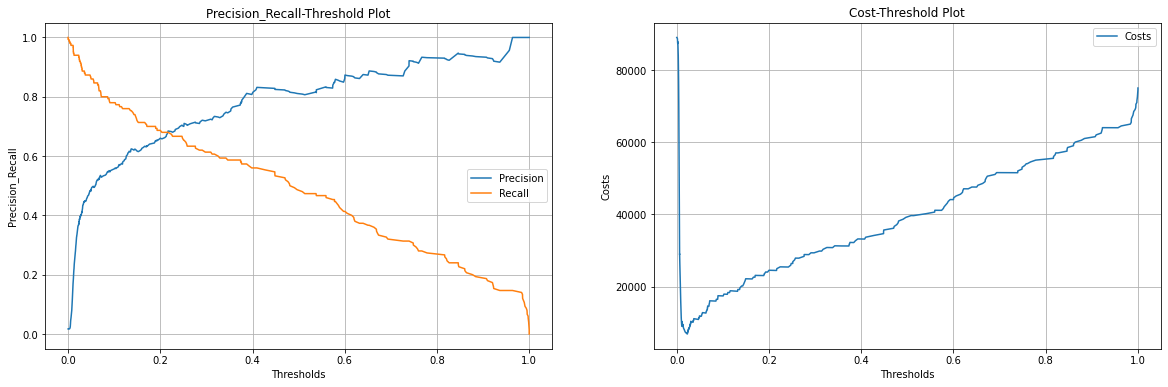

Best threshold: 0.0232
Min cost: 6880.00
Train Cost:  39550
Test Cost:  17720


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mean_std, y_valid)

y_train_pred = calib.predict_proba(train_mean_std)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mean_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mean","SVM", train_cost, cost, test_cost])

##### Random Forest

In [ ]:
params = {"max_depth": [2, 3, 5, 8, 10, 15, 20],
              "n_estimators": [10, 20, 30],
              "min_samples_split": sp_randint(2, 9),
              "min_samples_leaf": sp_randint(1, 9),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_mean, y_train)

print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mean, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=8,
                       min_samples_split=6, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight='balanced_subsample',
                                                             criterion='gini',
                                                             max_depth=3,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=8,
                                                             min_samples_split=6,
                  



  0%|          | 0/2253 [00:00<?, ?it/s]

  0%|          | 5/2253 [00:00<00:53, 42.40it/s]

  0%|          | 9/2253 [00:00<00:54, 41.29it/s]

  1%|          | 13/2253 [00:00<00:55, 40.25it/s]

  1%|          | 18/2253 [00:00<00:54, 40.68it/s]

  1%|          | 22/2253 [00:00<00:56, 39.63it/s]

  1%|          | 26/2253 [00:00<00:56, 39.51it/s]

  1%|▏         | 31/2253 [00:00<00:55, 40.04it/s]

  2%|▏         | 35/2253 [00:00<00:57, 38.42it/s]

  2%|▏         | 39/2253 [00:00<00:56, 38.85it/s]

  2%|▏         | 44/2253 [00:01<00:55, 39.53it/s]

  2%|▏         | 48/2253 [00:01<00:55, 39.57it/s]

  2%|▏         | 52/2253 [00:01<00:56, 38.85it/s]

  3%|▎         | 57/2253 [00:01<00:55, 39.79it/s]

  3%|▎         | 62/2253 [00:01<00:54, 40.34it/s]

  3%|▎         | 67/2253 [00:01<00:53, 41.02it/s]

  3%|▎         | 72/2253 [00:01<00:52, 41.59it/s]

  3%|▎         | 77/2253 [00:01<00:52, 41.31it/s]

  4%|▎         | 82/2253 [00:02<00:52, 41.57it/s]

  4%|▍         | 87/2253 [00:02<00:51, 4

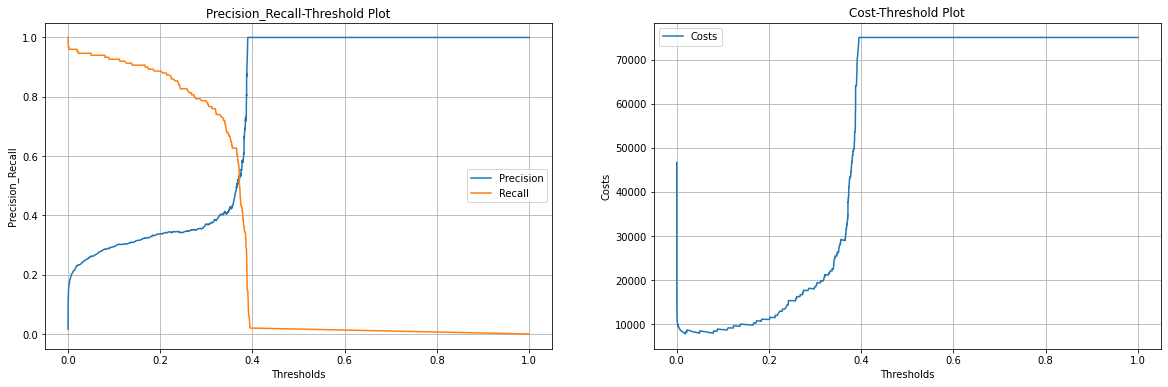

Best threshold: 0.0190
Min cost: 7810.00
Train Cost:  44390
Test Cost:  13250


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mean, y_valid)

y_train_pred = calib.predict_proba(train_mean)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mean)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mean","Random Forest", train_cost, cost, test_cost])

##### XGBoost

In [ ]:
params = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]
          }

xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, params, cv=5, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(train_mean, y_train)

print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mean, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.9min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=20,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=50, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state



  0%|          | 0/3339 [00:00<?, ?it/s]

  0%|          | 5/3339 [00:00<01:21, 41.01it/s]

  0%|          | 9/3339 [00:00<01:23, 39.79it/s]

  0%|          | 14/3339 [00:00<01:22, 40.43it/s]

  1%|          | 19/3339 [00:00<01:20, 41.01it/s]

  1%|          | 24/3339 [00:00<01:21, 40.83it/s]

  1%|          | 29/3339 [00:00<01:20, 41.11it/s]

  1%|          | 33/3339 [00:00<01:21, 40.45it/s]

  1%|          | 38/3339 [00:00<01:21, 40.73it/s]

  1%|▏         | 42/3339 [00:01<01:22, 39.75it/s]

  1%|▏         | 46/3339 [00:01<01:23, 39.66it/s]

  1%|▏         | 50/3339 [00:01<01:24, 39.10it/s]

  2%|▏         | 55/3339 [00:01<01:22, 39.71it/s]

  2%|▏         | 60/3339 [00:01<01:21, 40.06it/s]

  2%|▏         | 65/3339 [00:01<01:20, 40.56it/s]

  2%|▏         | 70/3339 [00:01<01:19, 40.87it/s]

  2%|▏         | 75/3339 [00:01<01:20, 40.70it/s]

  2%|▏         | 80/3339 [00:01<01:19, 41.04it/s]

  3%|▎         | 85/3339 [00:02<01:18, 41.26it/s]

  3%|▎         | 90/3339 [00:02<01:20, 4

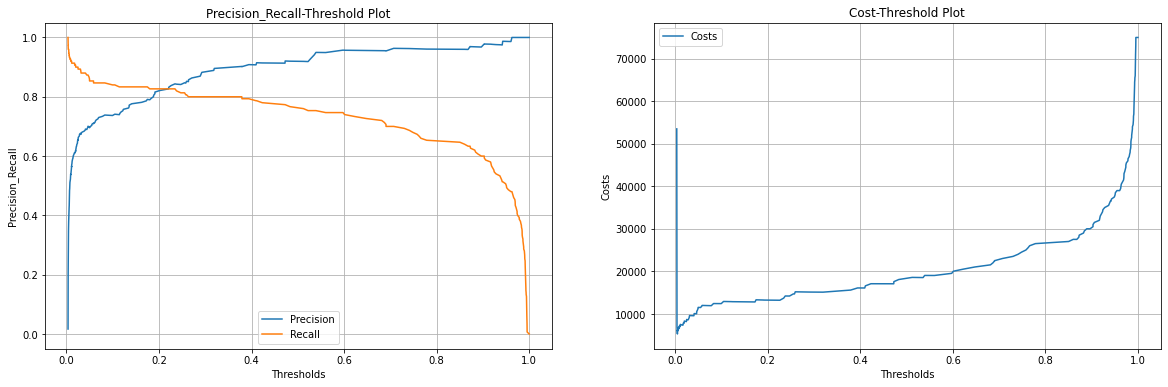

Best threshold: 0.0048
Min cost: 5300.00
Train Cost:  18600
Test Cost:  12380


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mean, y_valid)

y_train_pred = calib.predict_proba(train_mean)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mean)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mean","XGBoost", train_cost, cost, test_cost])

#### Median

##### Logistic Regression

In [ ]:
C = [math.pow(10,i) for i in range(-2,2)]

params = [{'C': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

clf = GridSearchCV(LogisticRegression(), params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_median_std, y_train)

print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_median_std, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'class_weight': 'balanced'}


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight='balanced',
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                        



  2%|▏         | 169/9001 [00:22<03:41, 39.94it/s]

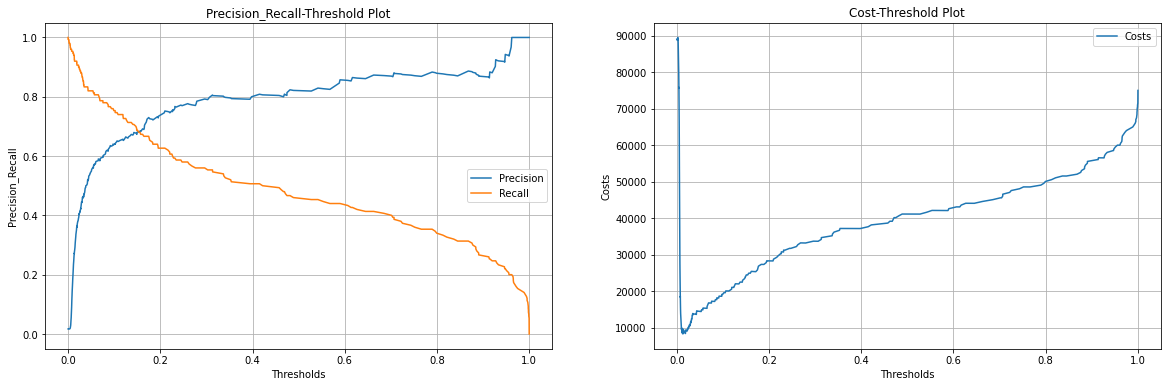

Best threshold: 0.0133
Min cost: 8310.00
Train Cost:  33310
Test Cost:  15070


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_median_std, y_valid)

y_train_pred = calib.predict_proba(train_median_std)[:,1] > threshold
y_test_pred = calib.predict_proba(test_median_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Median","Logistic Regression", train_cost, cost, test_cost])

##### Support Vector Machine

In [ ]:
C = [math.pow(10,i) for i in range(-2,2)]

params = [{'alpha': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

clf = GridSearchCV(SGDClassifier(loss="hinge",max_iter=1000, n_jobs=-1), params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_median_std, y_train)

print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_median_std, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.0min finished


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'class_weight': 'balanced'}


CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

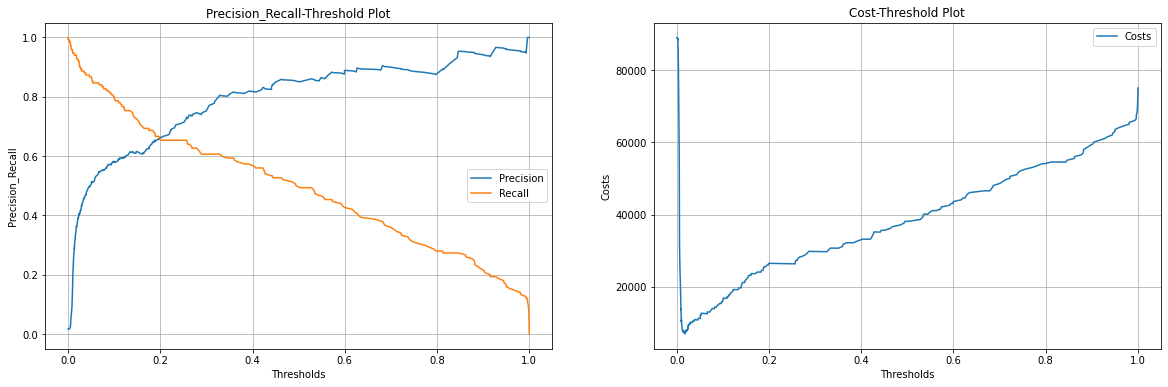

Best threshold: 0.0183
Min cost: 6960.00
Train Cost:  37890
Test Cost:  17410


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_median_std, y_valid)

y_train_pred = calib.predict_proba(train_median_std)[:,1] > threshold
y_test_pred = calib.predict_proba(test_median_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Median","SVM", train_cost, cost, test_cost])

##### Random Forest

In [ ]:
params = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25],
              "n_estimators": [10, 20, 30, 35],
              "min_samples_split": sp_randint(2, 9),
              "min_samples_leaf": sp_randint(1, 9),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_median, y_train)

print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_median, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight='balanced',
                                                             criterion='gini',
                                                             max_depth=3,
                                                             max_features='sqrt',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=8,
                                                             min_samples_split=3,
                            

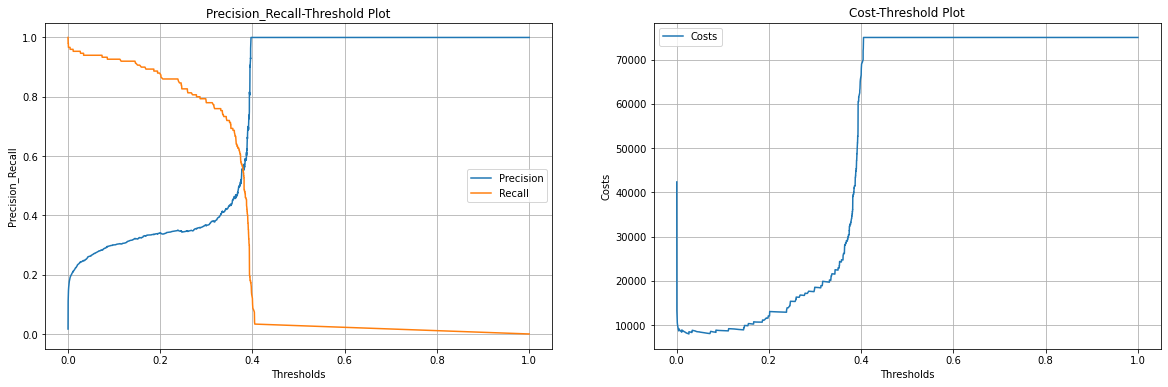

Best threshold: 0.0268
Min cost: 7970.00
Train Cost:  47630
Test Cost:  15070


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_median, y_valid)

y_train_pred = calib.predict_proba(train_median)[:,1] > threshold
y_test_pred = calib.predict_proba(test_median)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Median","Random Forest", train_cost, cost, test_cost])

##### XGBoost

In [ ]:
params = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}

xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, params, cv=5, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(train_median, y_train)

print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_median, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.6min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.5,
                                                    gamma=0, learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=25,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=40, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_sta

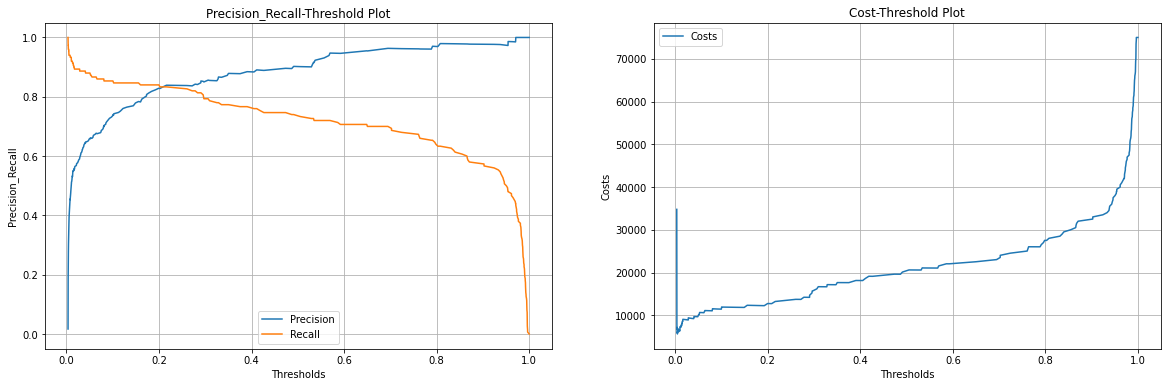

Best threshold: 0.0049
Min cost: 5640.00
Train Cost:  22370
Test Cost:  10760


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_median, y_valid)

y_train_pred = calib.predict_proba(train_median)[:,1] > threshold
y_test_pred = calib.predict_proba(test_median)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Median","XGBoost", train_cost, cost, test_cost])

#### Mode

##### Logistic Regression

In [ ]:
C = [math.pow(10,i) for i in range(-2,2)]

params = [{'C': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

clf = GridSearchCV(LogisticRegression(), params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_mode_std, y_train)

print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mode_std, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.0min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'class_weight': 'balanced'}


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight='balanced',
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                        

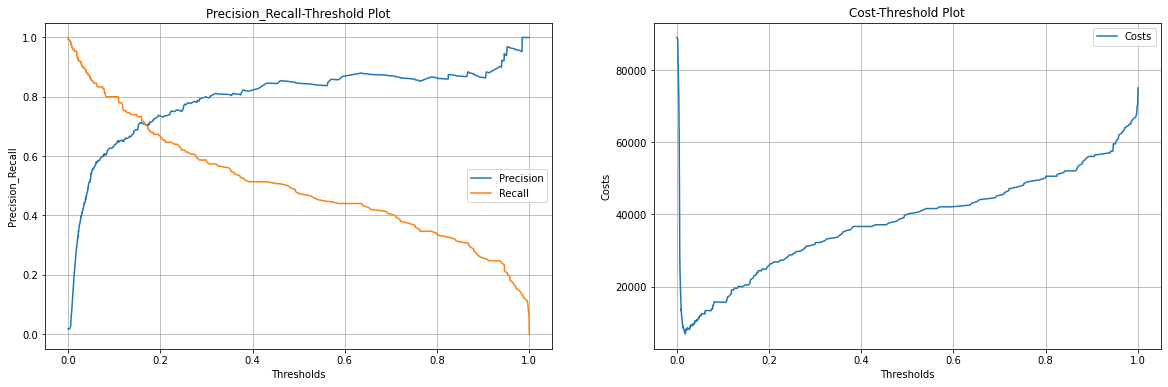

Best threshold: 0.0189
Min cost: 6890.00
Train Cost:  32440
Test Cost:  15800


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mode_std, y_valid)

y_train_pred = calib.predict_proba(train_mode_std)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mode_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mode","Logistic Regression", train_cost, cost, test_cost])

##### Support Vector Machine

In [ ]:
C = [math.pow(10,i) for i in range(-2,2)]

params = [{'alpha': C}, {'penalty':['l1','l2']}, {'class_weight':[None,'balanced']}]

clf = GridSearchCV(SGDClassifier(loss="hinge",max_iter=1000, n_jobs=-1), params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_mode_std, y_train)

print(clf.best_estimator_)
print(clf.best_params_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mode_std, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.0min finished


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
{'class_weight': 'balanced'}


CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=-1, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

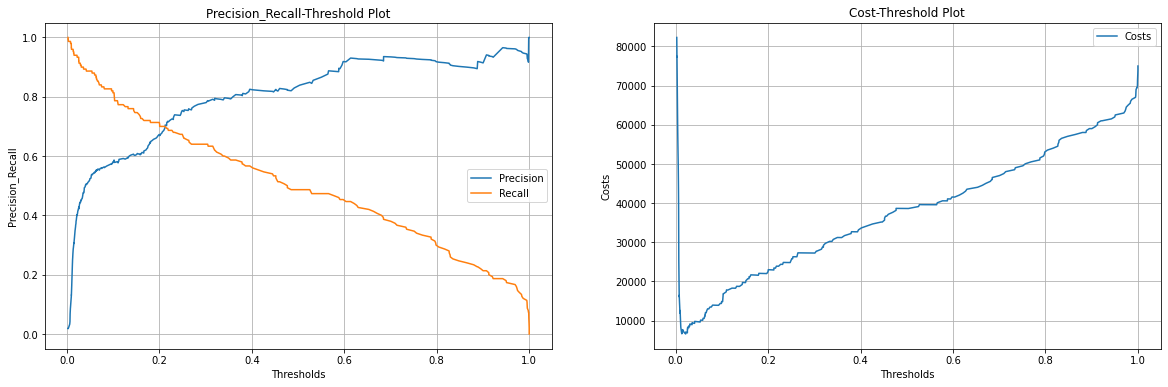

Best threshold: 0.0219
Min cost: 6600.00
Train Cost:  42660
Test Cost:  18290


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mode_std, y_valid)

y_train_pred = calib.predict_proba(train_mode_std)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mode_std)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mode","SVM", train_cost, cost, test_cost])

##### Random Forest

In [ ]:
params = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25],
              "n_estimators": [10, 20, 30, 35],
              "min_samples_split": sp_randint(2, 9),
              "min_samples_leaf": sp_randint(1, 9),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(train_mode, y_train)

print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mode, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight='balanced_subsample',
                                                             criterion='gini',
                                                             max_depth=3,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=2,
                                                             min_samples_split=8,
                  

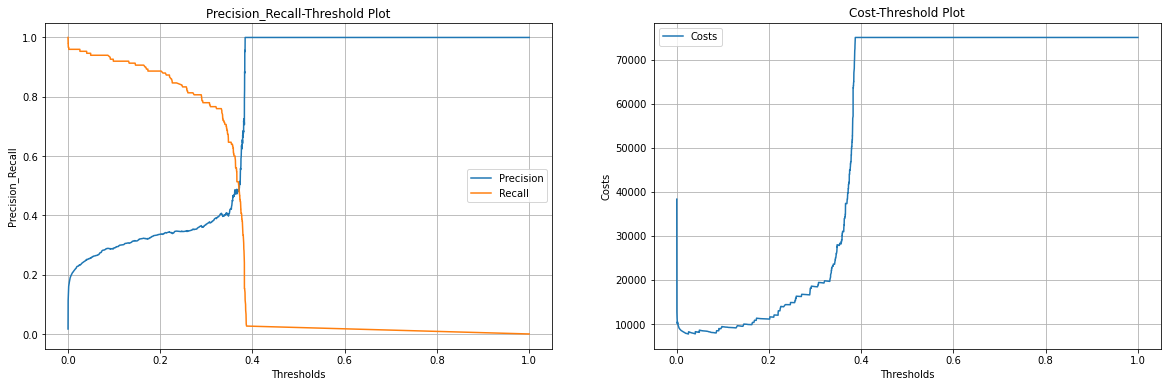

Best threshold: 0.0258
Min cost: 7730.00
Train Cost:  44110
Test Cost:  13770


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mode, y_valid)

y_train_pred = calib.predict_proba(train_mode)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mode)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mode","Random Forest", train_cost, cost, test_cost])

##### XGBoost

In [ ]:
params = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}

xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, params, cv=5, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(train_mode, y_train)

print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(train_mode, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.1min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.5,
                                                    gamma=0, learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=15,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=50, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_sta

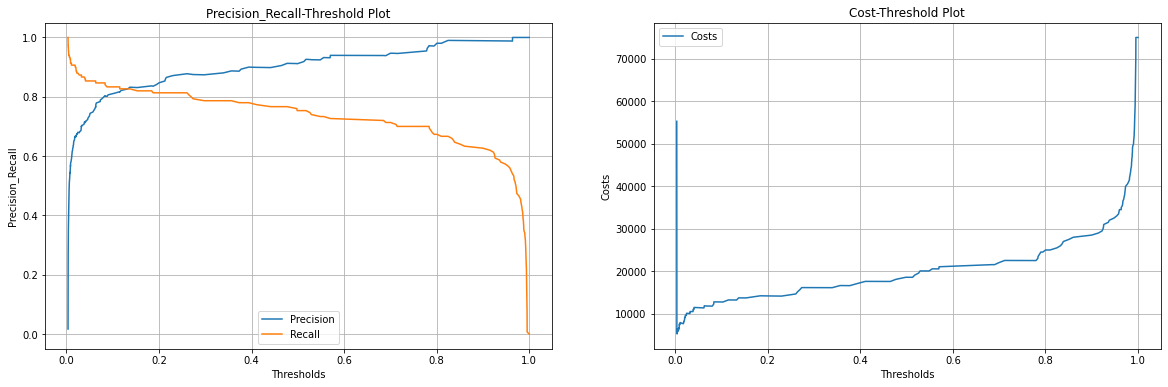

Best threshold: 0.0041
Min cost: 5260.00
Train Cost:  16810
Test Cost:  10180


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mode, y_valid)

y_train_pred = calib.predict_proba(train_mode)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mode)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs.append(["Mode","XGBoost", train_cost, cost, test_cost])

### Using Oversampled Data using SMOTE

In [ ]:
def SMOTE_oversampling(X, Y):
    sm = SMOTE(ratio = 1.0)
    X_ovs,Y_ovs = sm.fit_sample(X, Y)
    print(X_ovs.shape, Y_ovs.shape)
    print(np.bincount(Y_ovs))
    return X_ovs, Y_ovs

In [ ]:
costs_ovs = []

#### Mean

In [ ]:
X_train, y_train = SMOTE_oversampling(train_mean, y_train)

(100300, 170) (100300,)
[50150 50150]


##### Random Forest

In [ ]:
params = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25],
              "n_estimators": [10, 20, 30, 35],
              "min_samples_split": sp_randint(2, 9),
              "min_samples_leaf": sp_randint(1, 9),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)

print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight='balanced',
                                                             criterion='gini',
                                                             max_depth=15,
                                                             max_features='sqrt',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=3,
                           

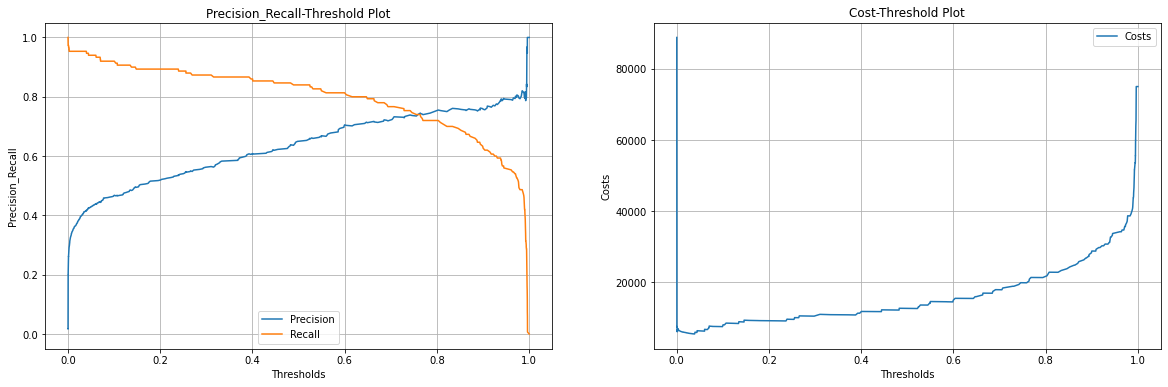

Best threshold: 0.0388
Min cost: 5500.00
Train Cost:  11420
Test Cost:  15320


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mean, y_valid)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mean)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs_ovs.append(["Mean","Random Forest", train_cost, cost, test_cost])

##### XGBoost

In [ ]:
params = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}

xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, params, cv=5, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)

print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 16.7min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.3,
                                                    gamma=0, learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=20,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=30, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_sta

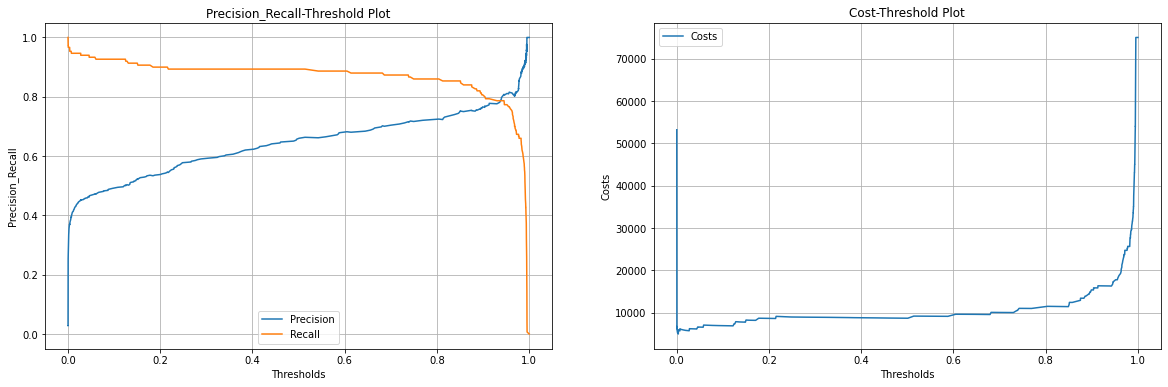

Best threshold: 0.0036
Min cost: 4960.00
Train Cost:  15850
Test Cost:  10170


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mean, y_valid)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mean)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs_ovs.append(["Mean","XGBoost", train_cost, cost, test_cost])

#### Median

In [ ]:
y_train = temp
X_train, y_train = SMOTE_oversampling(train_median, y_train)

(100300, 170) (100300,)
[50150 50150]


##### Random Forest

In [ ]:
params = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25],
              "n_estimators": [10, 20, 30, 35],
              "min_samples_split": sp_randint(2, 9),
              "min_samples_leaf": sp_randint(1, 9),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)

print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=25,
                                                             max_features='sqrt',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=3,
                                 

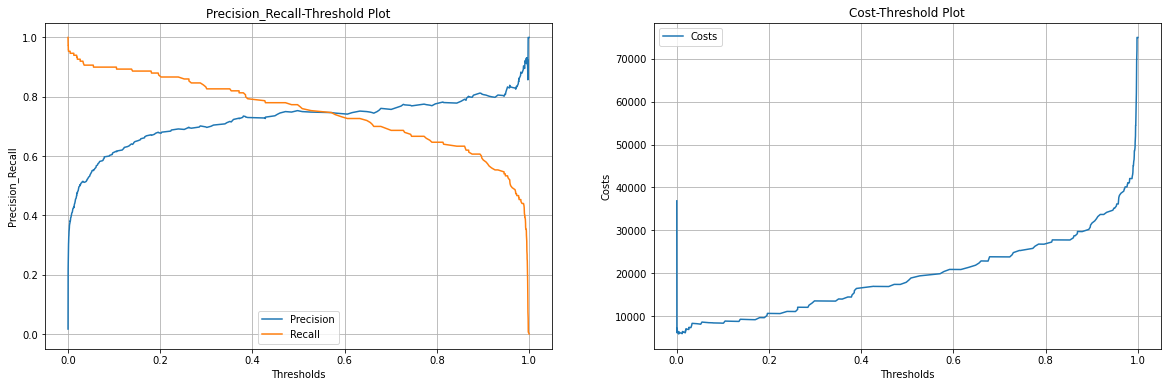

Best threshold: 0.0045
Min cost: 5820.00
Train Cost:  6960
Test Cost:  13360


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_median, y_valid)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(test_median)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs_ovs.append(["Median","Random Forest", train_cost, cost, test_cost])

##### XGBoost

In [ ]:
params = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}

xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, params, cv=5, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)

print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 39.2min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


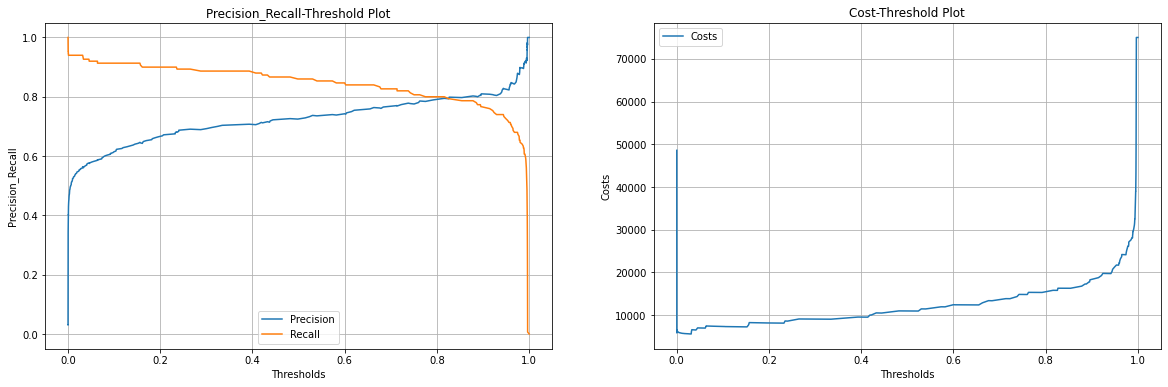

Best threshold: 0.0315
Min cost: 5590.00
Train Cost:  5320
Test Cost:  18650


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_median, y_valid)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(test_median)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs_ovs.append(["Median","XGBoost", train_cost, cost, test_cost])

#### Mode

In [ ]:
y_train = temp
X_train, y_train = SMOTE_oversampling(train_mode, y_train)

(100300, 170) (100300,)
[50150 50150]


##### Random Forest

In [ ]:
params = {"max_depth": [2, 3, 5, 8, 10, 15, 20, 25],
              "n_estimators": [10, 20, 30, 35],
              "min_samples_split": sp_randint(2, 9),
              "min_samples_leaf": sp_randint(1, 9),
                "max_features": ['auto', 'sqrt'],
                "class_weight": ['balanced', 'balanced_subsample', None]
             }
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf = RandomizedSearchCV(rf, params, cv=5, scoring='recall', n_jobs=-1, verbose=10)
clf.fit(X_train, y_train)

print(clf.best_estimator_)

best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight='balanced',
                                                             criterion='gini',
                                                             max_depth=25,
                                                             max_features='sqrt',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=8,
                           

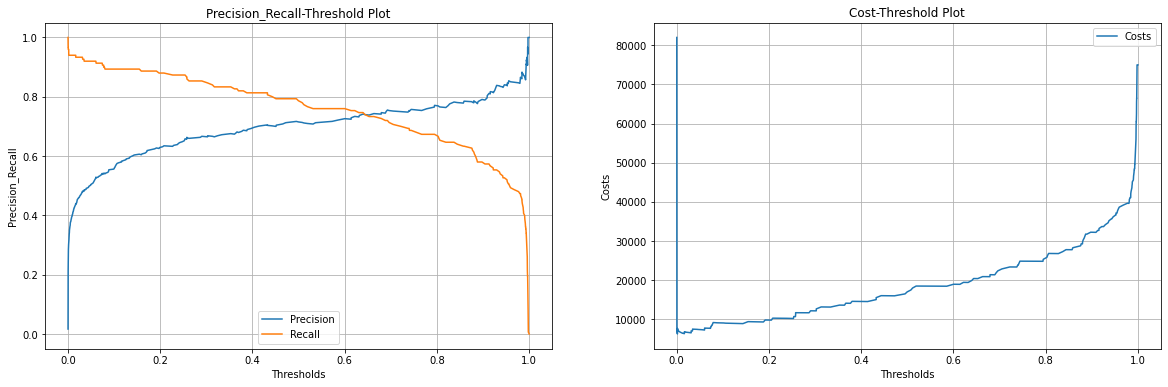

Best threshold: 0.0015
Min cost: 6220.00
Train Cost:  11140
Test Cost:  10240


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mode, y_valid)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mode)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs_ovs.append(["Mode","Random Forest", train_cost, cost, test_cost])

##### XGBoost

In [ ]:
params = {"n_estimators": [10, 20, 30, 40, 50],
                   "max_depth" : [2, 3, 5, 10, 15, 20, 25, 30],
                    'colsample_bytree':[0.1,0.3,0.5,1],
                   'subsample':[0.1,0.3,0.5,1]}

xgbc = xgb.XGBClassifier(n_jobs = -1, random_state=42)
clf = RandomizedSearchCV(xgbc, params, cv=5, scoring='recall', n_jobs = -1, verbose=10)
clf.fit(X_train, y_train)

print(clf.best_estimator_)
best_estimator = clf.best_estimator_

calib = CalibratedClassifierCV(best_estimator, cv=5, method='sigmoid')
calib.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 16.9min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.3,
                                                    gamma=0, learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=25,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=30, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_sta

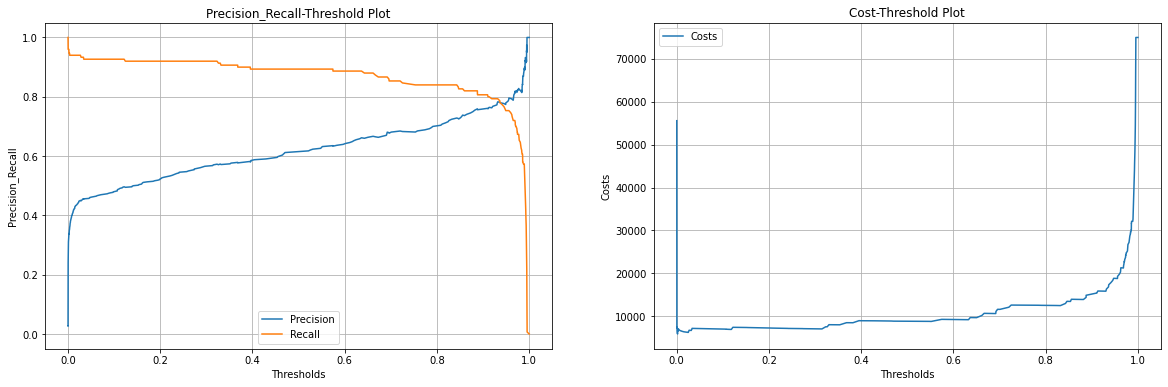

Best threshold: 0.0020
Min cost: 5850.00
Train Cost:  13480
Test Cost:  10270


In [ ]:
threshold, cost = plot_precision_recall_costs(calib, valid_mode, y_valid)

y_train_pred = calib.predict_proba(X_train)[:,1] > threshold
y_test_pred = calib.predict_proba(test_mode)[:,1] > threshold
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
train_cost = fp*10+fn*500
print("Train Cost: ", train_cost)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
test_cost = fp*10+fn*500
print("Test Cost: ", test_cost)
costs_ovs.append(["Mode","XGBoost", train_cost, cost, test_cost])

### Concluding so far

#### Imbalanced Data

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Impute", "Model", "Train Cost", "CV Cost", "Test Cost"]

for i in costs:
    x.add_row(i)
print(x)

+--------+---------------------+------------+---------+-----------+
| Impute |        Model        | Train Cost | CV Cost | Test Cost |
+--------+---------------------+------------+---------+-----------+
|  Mean  | Logistic Regression |   32150    |   7030  |   15060   |
|  Mean  |         SVM         |   39550    |   6880  |   17720   |
|  Mean  |    Random Forest    |   44390    |   7810  |   13250   |
|  Mean  |       XGBoost       |   18600    |   5300  |   12380   |
| Median | Logistic Regression |   33310    |   8310  |   15070   |
| Median |         SVM         |   37890    |   6960  |   17410   |
| Median |    Random Forest    |   47630    |   7970  |   15070   |
| Median |       XGBoost       |   22370    |   5640  |   10760   |
|  Mode  | Logistic Regression |   32440    |   6890  |   15800   |
|  Mode  |         SVM         |   42660    |   6600  |   18290   |
|  Mode  |    Random Forest    |   44110    |   7730  |   13770   |
|  Mode  |       XGBoost       |   16810    |   

#### Oversampled data

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Impute", "Model", "Train Cost", "CV Cost", "Test Cost"]

for i in costs_ovs:
    x.add_row(i)
print(x)

+--------+---------------+------------+---------+-----------+
| Impute |     Model     | Train Cost | CV Cost | Test Cost |
+--------+---------------+------------+---------+-----------+
|  Mean  | Random Forest |   11420    |   5500  |   15320   |
|  Mean  |    XGBoost    |   15850    |   4960  |   10170   |
| Median | Random Forest |    6960    |   5820  |   13360   |
| Median |    XGBoost    |    5320    |   5590  |   18650   |
+--------+---------------+------------+---------+-----------+


###Forward fill imputation (Along rows)

In [ ]:
f_train=train.ffill(axis=0)
f_train.isna().any().value_counts()

False    166
True       5
dtype: int64

In [ ]:
f_test=test.ffill(axis=0)
f_test.isna().any().value_counts()

False    163
True       8
dtype: int64

In [ ]:
f_train=f_train.dropna() #Dropping remaining residual missing values
f_test=f_test.dropna()

In [ ]:
X_train=f_train.drop(['class'],axis=1)  # Splitting the features and target from the dataframe
y_train=f_train['class']

X_test=f_test.drop(['class'],axis=1)
y_test=f_test['class']

#### Oversampling - SMOTE

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

#### Normalization - MinMax

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# X_train[X_train.columns] = min_max_scaler.fit_transform(X_train[X_train.columns])
# X_test[X_test.columns] = min_max_scaler.transform(X_test[X_test.columns])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(117976, 170)
(31226, 170)


In [ ]:
pd.DataFrame(y_train).value_counts()

1    58988
0    58988
dtype: int64

In [ ]:
LogisticRegressionFunc(X_train, X_test, y_train, y_test)
# KNN(X_train, X_test, y_train, y_test)
RandomForest(X_train, X_test, y_train, y_test)
SVM(X_train, X_test, y_train, y_test)
NaivesBayes(X_train, X_test, y_train, y_test)
DecisionTree(X_train, X_test, y_train, y_test)

** Logistic Regression: 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Result:

accuracy score: 0.9558

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     58988
           1       0.97      0.94      0.95     58988

    accuracy                           0.96    117976
   macro avg       0.96      0.96      0.96    117976
weighted avg       0.96      0.96      0.96    117976


Confusion Matrix: 
 [[57493  1495]
 [ 3716 55272]]

ROC AUC: 0.9558

Total cost:		 1872950
-------------------------------------------------------

Test Result:

accuracy score: 0.9629

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     15613
           1       0.97      0.95      0.96     15613

    accuracy                           0.96     31226
   macro avg       0.96      0.96      0.96     31226
weighted avg       0.96      0.96      0.96     31226


Confusion Matrix: 
 [[15226   387]
 [  773 14840]]

ROC AUC: 0.9629



KeyboardInterrupt: ignored

### Backward fill imputation (Along rows)

In [ ]:
b_train=train.bfill(axis=0)
b_train.isna().any().value_counts()

False    163
True       8
dtype: int64

In [ ]:
b_test=test.bfill(axis=0)
b_test.isna().any().value_counts()

False    163
True       8
dtype: int64

In [ ]:
b_train=b_train.dropna() #Dropping remaining residual missing values
b_test=b_test.dropna()

In [ ]:
X_train=b_train.drop(['class'],axis=1)  # Splitting the features and target from the dataframe
y_train=b_train['class']

X_test=b_test.drop(['class'],axis=1)
y_test=b_test['class']

In [ ]:
LogisticRegressionFunc(X_train, X_test, y_train, y_test)
KNN(X_train, X_test, y_train, y_test)
RandomForest(X_train, X_test, y_train, y_test)
SVM(X_train, X_test, y_train, y_test)
NaivesBayes(X_train, X_test, y_train, y_test)
DecisionTree(X_train, X_test, y_train, y_test)

Train Result:

accuracy score: 0.9890

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     58996
           1       0.73      0.55      0.62      1000

    accuracy                           0.99     59996
   macro avg       0.86      0.77      0.81     59996
weighted avg       0.99      0.99      0.99     59996


Confusion Matrix: 
 [[58790   206]
 [  453   547]]

ROC AUC: 0.7718

Average Accuracy: 	 0.9886
Accuracy SD: 		 0.0015
Test Result:

accuracy score: 0.9865

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     15620
           1       0.79      0.58      0.67       375

    accuracy                           0.99     15995
   macro avg       0.89      0.79      0.83     15995
weighted avg       0.99      0.99      0.99     15995


Confusion Matrix: 
 [[15561    59]
 [  157   218]]

ROC AUC: 0.7888

Mean Absolute Error: 0.013504

##Ensemble Methods

####Bagging with Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.85,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_val, y_val)

bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

bag_clf.fit(X_val, y_val)

In [ ]:
print_score(bag_clf, X_train, X_val, y_train, y_val, train=False)

#### Ada boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_val, y_val)
print_score(clf, X_train, X_val, y_train, y_val, train=False)